Anomalies detected (from, to, cost):
(95, 72, 480.1)
(203, 80, 1071.1)
(107, 130, 862.1)
(227, 167, 1425.7)
(133, 269, 75.3)
(86, 214, 2712.1)
(128, 33, 195.8)
(115, 86, 1228.5)
(138, 284, 489.7)
(240, 91, 82.3)
(231, 247, 203.2)
(276, 292, 109.6)
(235, 264, 168.6)
(196, 198, 264.8)
(19, 266, 87.7)
(205, 244, 386.4)
(222, 79, 1270.1)
(91, 137, 98.3)
(174, 113, 755.8)


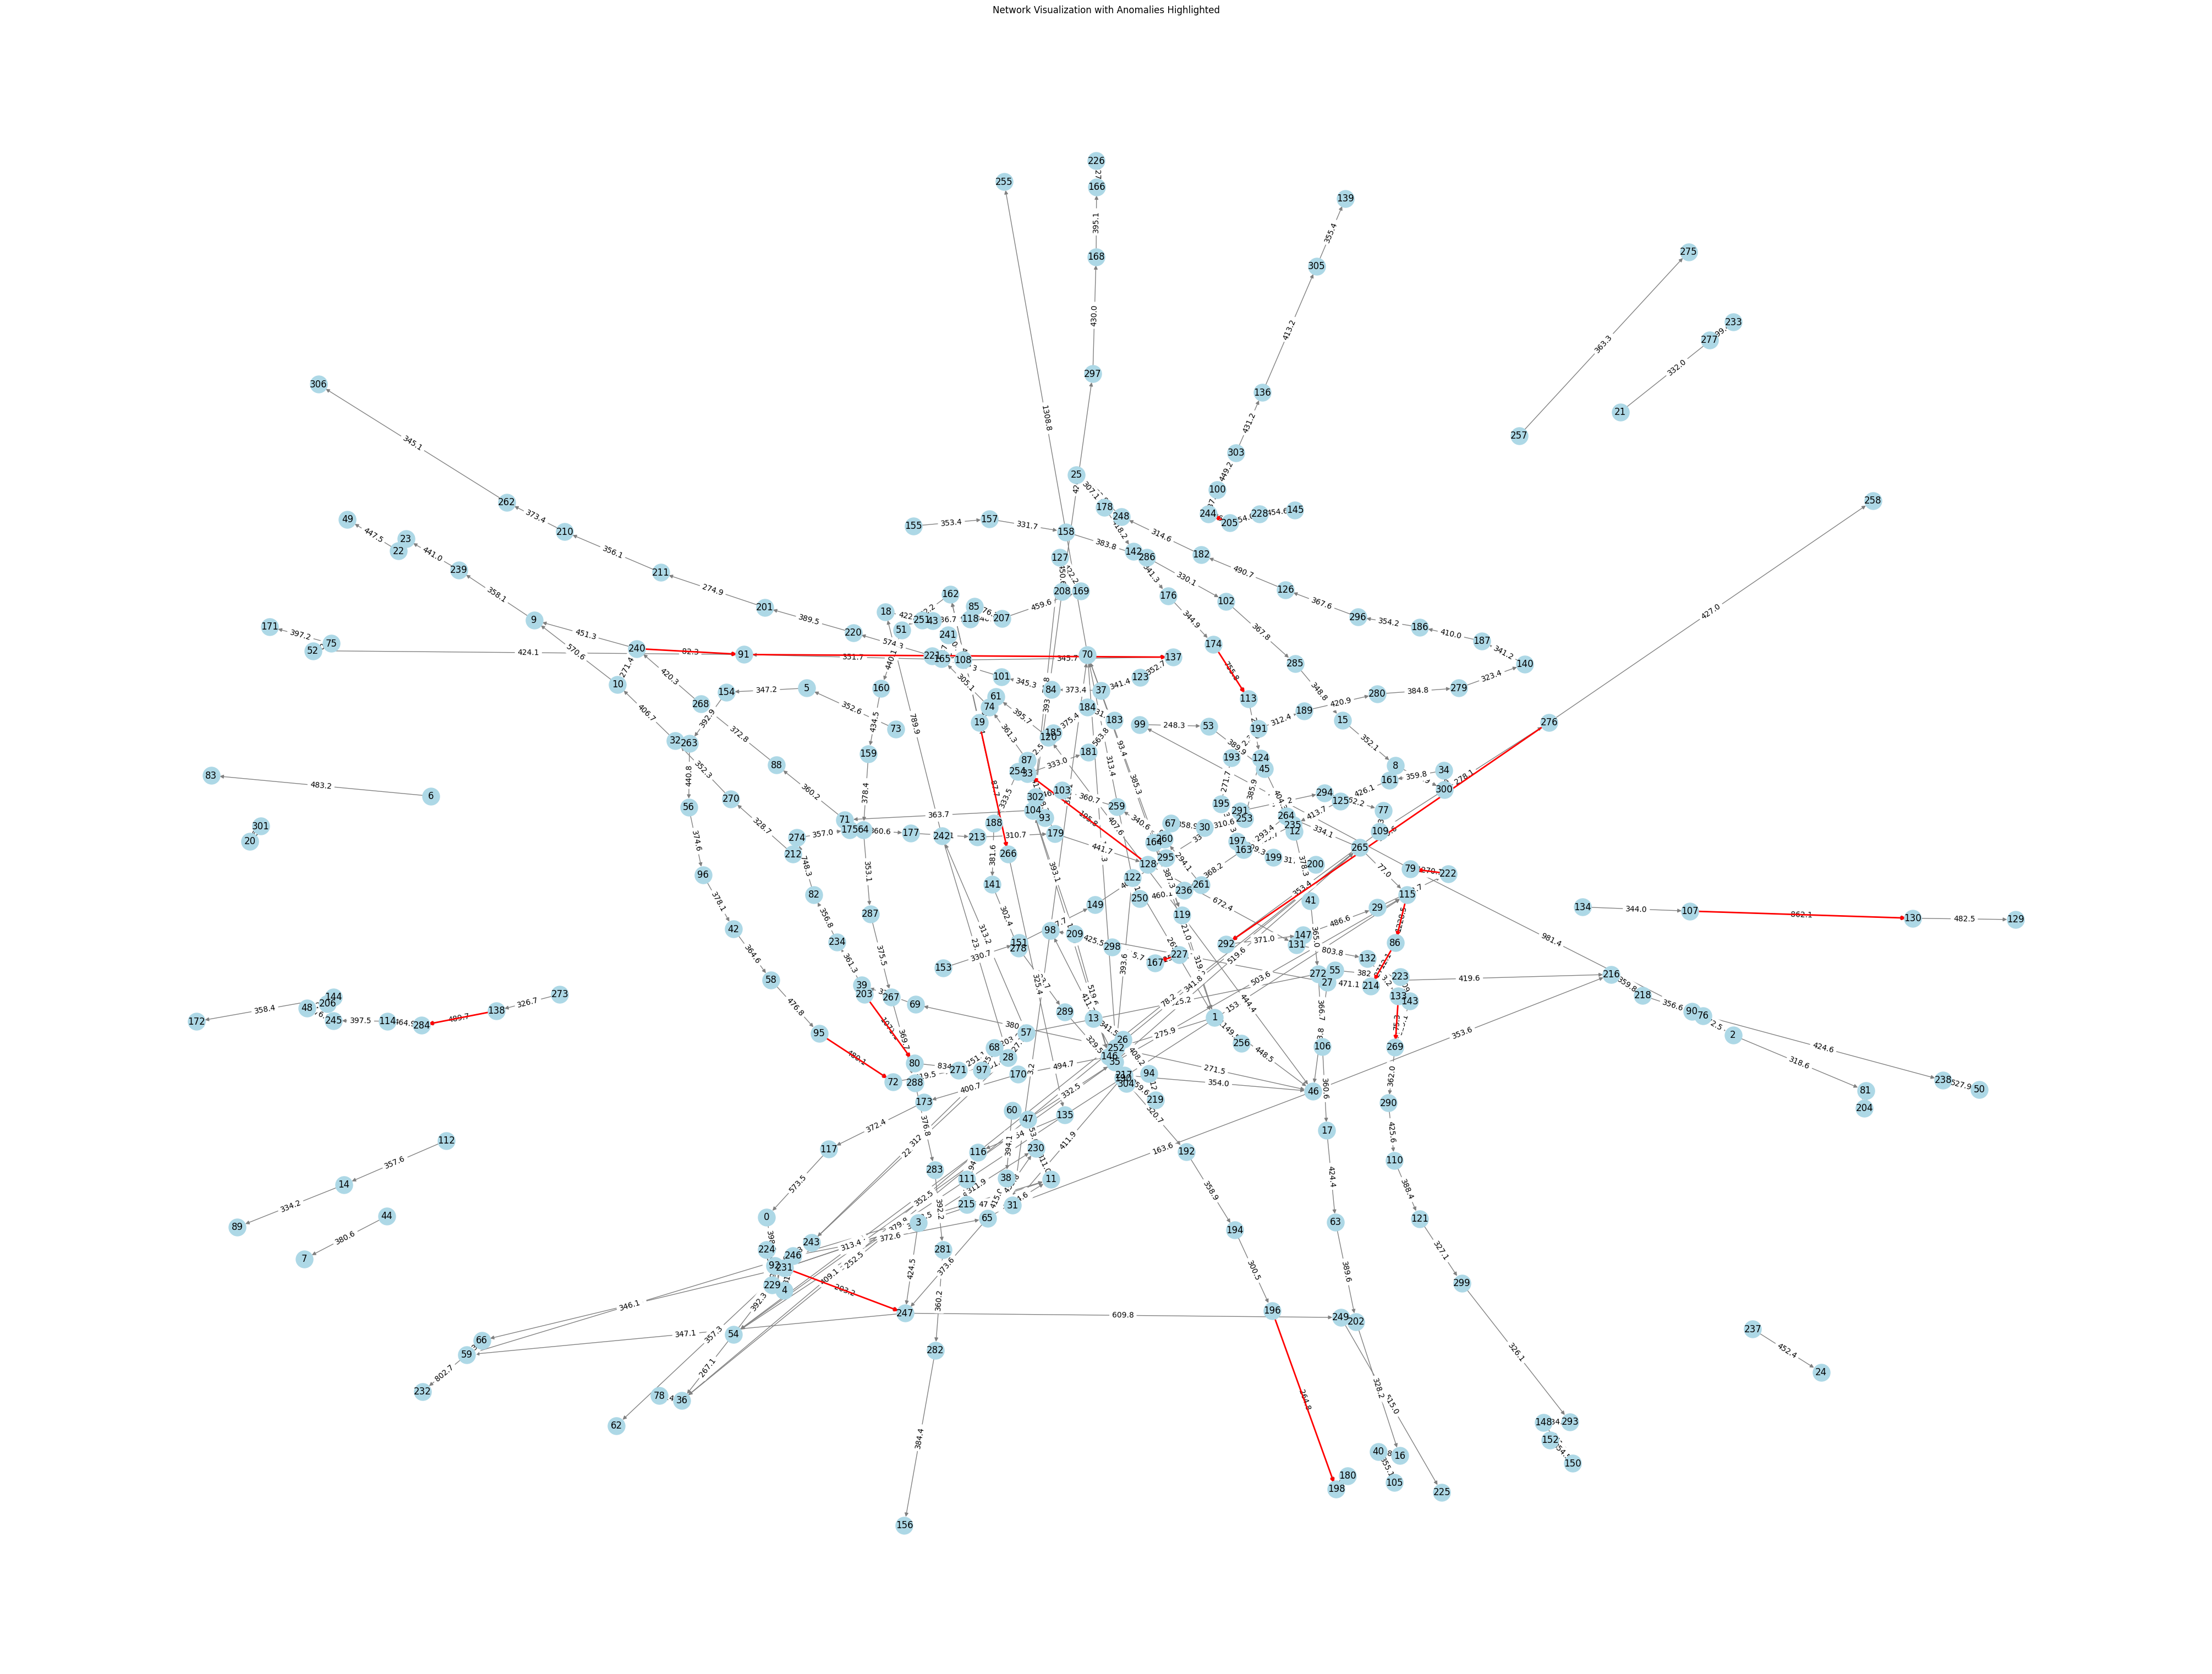

In [10]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv('./data/PEMS04/PEMS04.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

partition = community_louvain.best_partition(G.to_undirected())

for u, v, d in G.edges(data=True):
    d['community'] = partition[u]

anomalies = []
for community in set(partition.values()):
    edges = [(u, v, d['cost']) for u, v, d in G.edges(data=True) if d['community'] == community]
    costs = [cost for _, _, cost in edges]
    
    costs_reshaped = [[cost] for cost in costs]
    
    clf = IsolationForest(contamination=0.01, random_state=42)
    clf.fit(costs_reshaped)
    preds = clf.predict(costs_reshaped)
    
    for (u, v, cost), pred in zip(edges, preds):
        if pred == -1:
            anomalies.append((u, v, cost))

print("Anomalies detected (from, to, cost):")
for anomaly in anomalies:
    print(anomaly)
    
pos = nx.spring_layout(G)
plt.figure(figsize=(40, 30))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

anomaly_edges = [(u, v) for u, v, cost in anomalies]
nx.draw_networkx_edges(G, pos, edgelist=anomaly_edges, edge_color='r', width=2)

plt.title('Network Visualization with Anomalies Highlighted')
plt.savefig('./isolation/PEMS04')
plt.show()


Anomalies detected (from, to, cost):
(235, 654, 7.281000000000001)
(570, 3, 4.033)
(728, 281, 5.496)
(344, 494, 10.337)
(330, 39, 14.042)
(851, 280, 5.792999999999999)
(734, 71, 4.009)
(822, 138, 4.345)
(240, 683, 7.196)
(638, 703, 5.313)
(92, 878, 2.213)
(518, 98, 7.349)
(655, 345, 4.065)
(414, 656, 5.859)
(328, 685, 0.223)
(223, 499, 8.095)
(793, 72, 2.219)
(585, 36, 14.353)
(629, 390, 5.981)
(154, 192, 11.022)
(663, 789, 17.238)
(139, 1, 4.561)
(38, 46, 5.834)
(684, 296, 19.138)
(188, 229, 5.2)
(599, 292, 1.789)
(211, 433, 4.614)
(457, 110, 3.772)
(754, 587, 3.835)
(264, 396, 20.539)
(455, 225, 3.783)
(340, 696, 19.063)
(861, 740, 2.37)
(202, 218, 2.959)


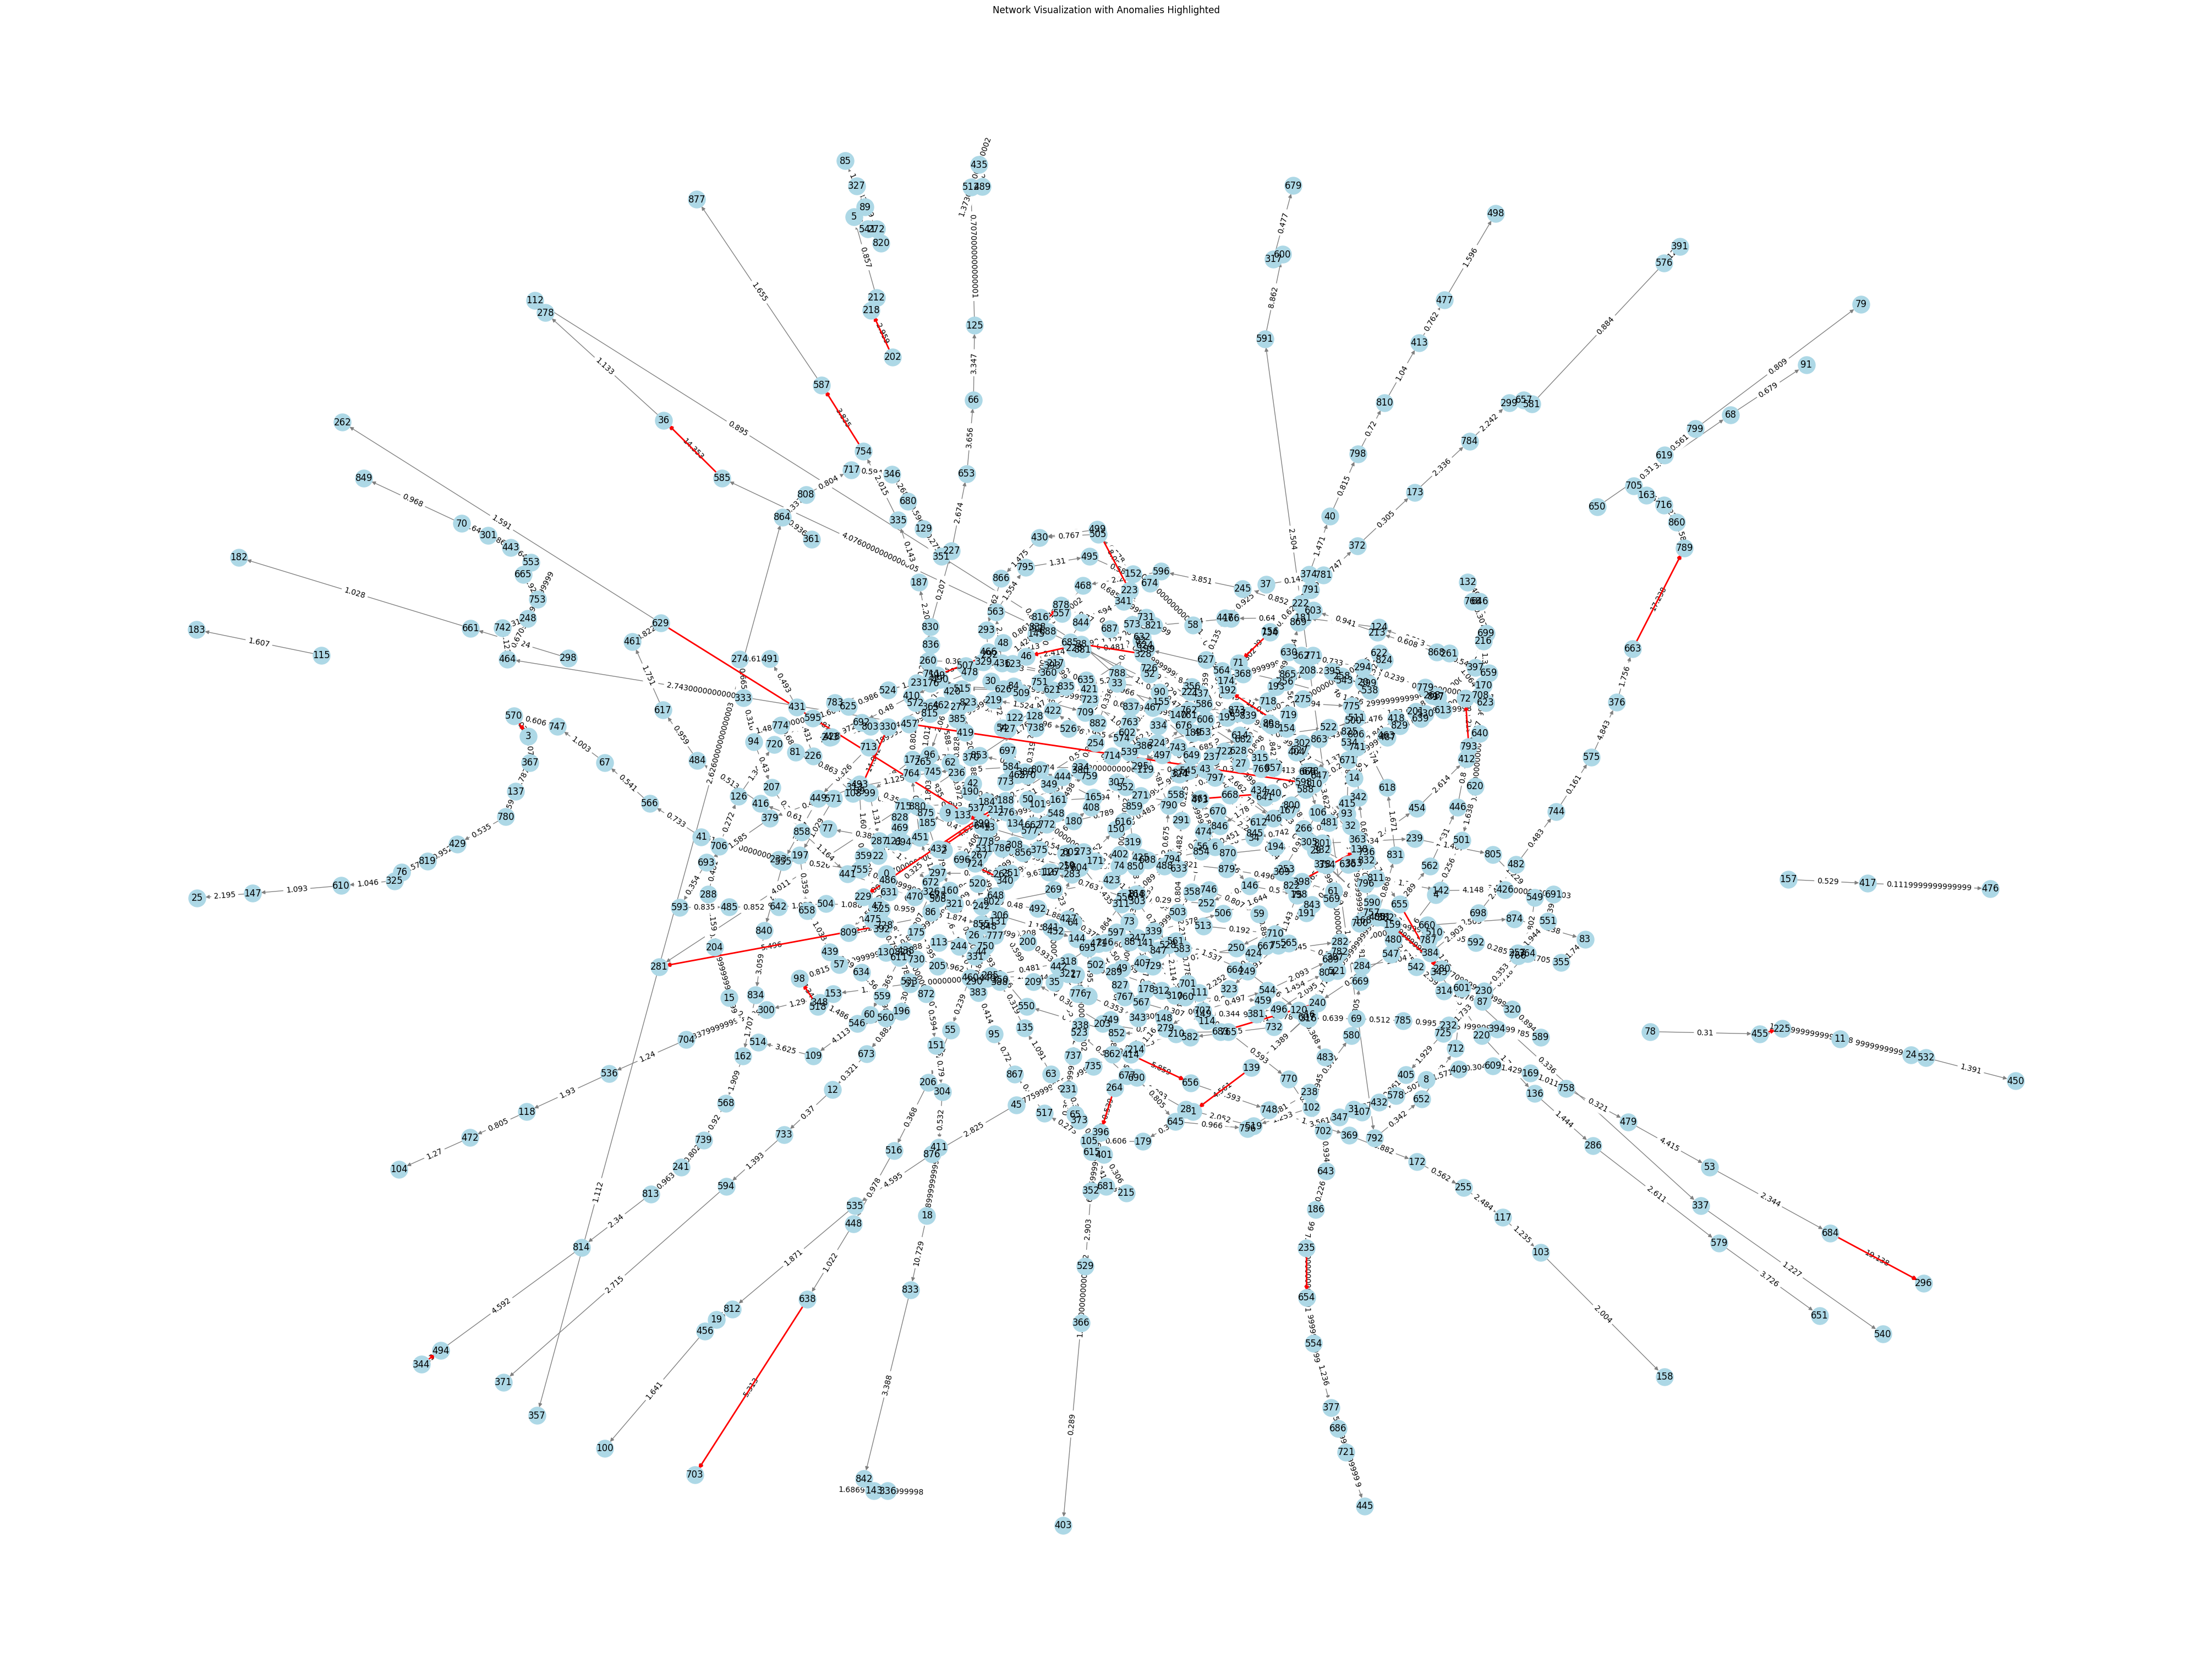

In [11]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv('./data/PEMS07/PEMS07.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

partition = community_louvain.best_partition(G.to_undirected())

for u, v, d in G.edges(data=True):
    d['community'] = partition[u]

anomalies = []
for community in set(partition.values()):
    edges = [(u, v, d['cost']) for u, v, d in G.edges(data=True) if d['community'] == community]
    costs = [cost for _, _, cost in edges]
    
    costs_reshaped = [[cost] for cost in costs]
    
    clf = IsolationForest(contamination=0.01, random_state=42)
    clf.fit(costs_reshaped)
    preds = clf.predict(costs_reshaped)
    
    for (u, v, cost), pred in zip(edges, preds):
        if pred == -1:
            anomalies.append((u, v, cost))

print("Anomalies detected (from, to, cost):")
for anomaly in anomalies:
    print(anomaly)
    
pos = nx.spring_layout(G)
plt.figure(figsize=(40, 30))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

anomaly_edges = [(u, v) for u, v, cost in anomalies]
nx.draw_networkx_edges(G, pos, edgelist=anomaly_edges, edge_color='r', width=2)

plt.title('Network Visualization with Anomalies Highlighted')
plt.savefig('./isolation/PEMS07')
plt.show()


Anomalies detected (from, to, cost):
(143, 10, 6.3)
(8, 117, 816.2)
(133, 91, 152.8)
(101, 19, 534.4)
(71, 61, 89.6)
(72, 162, 3274.4)
(25, 103, 350.2)
(90, 132, 152.2)
(145, 96, 85.1)
(162, 13, 554.5)
(110, 160, 102.0)


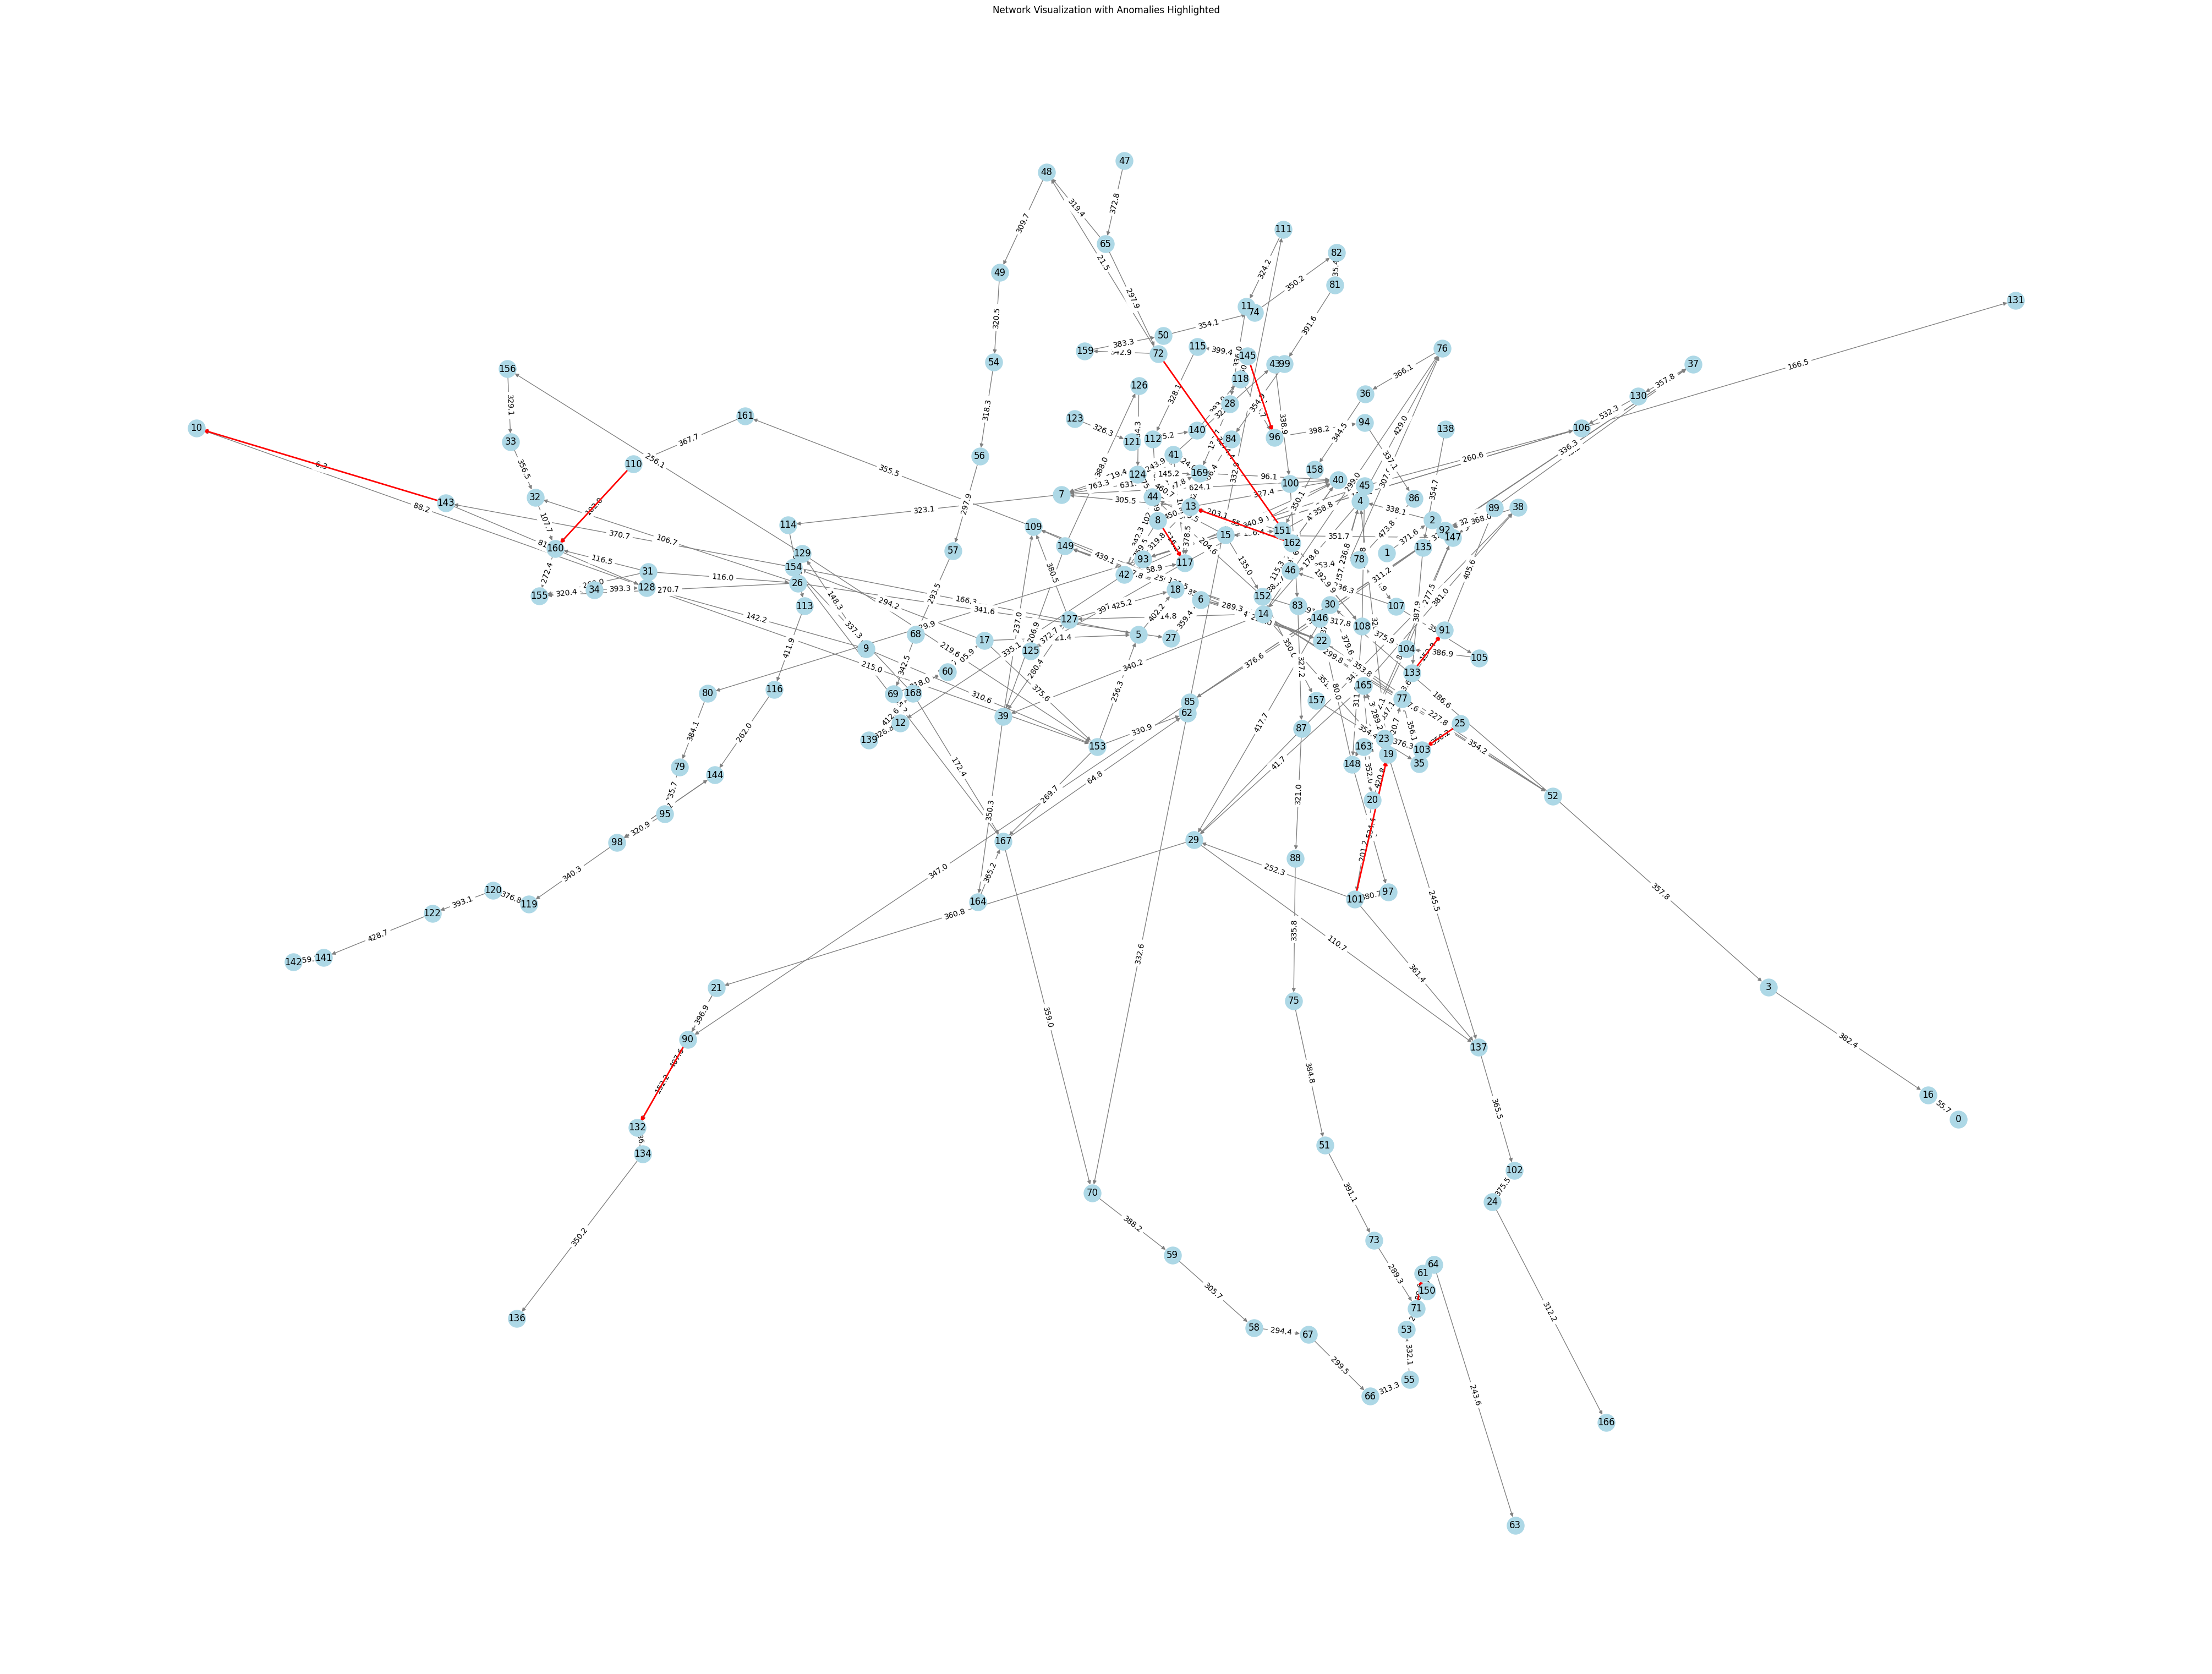

In [12]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv('./data/PEMS08/PEMS08.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

partition = community_louvain.best_partition(G.to_undirected())

for u, v, d in G.edges(data=True):
    d['community'] = partition[u]

anomalies = []
for community in set(partition.values()):
    edges = [(u, v, d['cost']) for u, v, d in G.edges(data=True) if d['community'] == community]
    costs = [cost for _, _, cost in edges]
    
    costs_reshaped = [[cost] for cost in costs]
    
    clf = IsolationForest(contamination=0.01, random_state=42)
    clf.fit(costs_reshaped)
    preds = clf.predict(costs_reshaped)
    
    for (u, v, cost), pred in zip(edges, preds):
        if pred == -1:
            anomalies.append((u, v, cost))

print("Anomalies detected (from, to, cost):")
for anomaly in anomalies:
    print(anomaly)
    
pos = nx.spring_layout(G)
plt.figure(figsize=(40, 30))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

anomaly_edges = [(u, v) for u, v, cost in anomalies]
nx.draw_networkx_edges(G, pos, edgelist=anomaly_edges, edge_color='r', width=2)

plt.title('Network Visualization with Anomalies Highlighted')
plt.savefig('./isolation/PEMS08')
plt.show()
